In [109]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import auc

import tensorflow as tf

In [110]:
df=pd.read_csv('C:/Users/Asus/Downloads/Flight delay dataset/Flight-Delay-Prediction/Data/Processed_data15.csv')

In [111]:
df=df[0:10000]

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     10000 non-null  int64 
 1   month    10000 non-null  int64 
 2   day      10000 non-null  int64 
 3   carrier  10000 non-null  object
 4   origin   10000 non-null  object
 5   dest     10000 non-null  object
 6   delayed  10000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.0+ KB


In [125]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [127]:
class_count_0, class_count_1 = df['delayed'].value_counts()

# Separate class
class_0 = df[df['delayed'] == 0]
class_1 = df[df['delayed'] == 1]

total class of 1 and0: 0    2073
1    2073
Name: delayed, dtype: int64


<Axes: title={'center': 'count (target)'}>

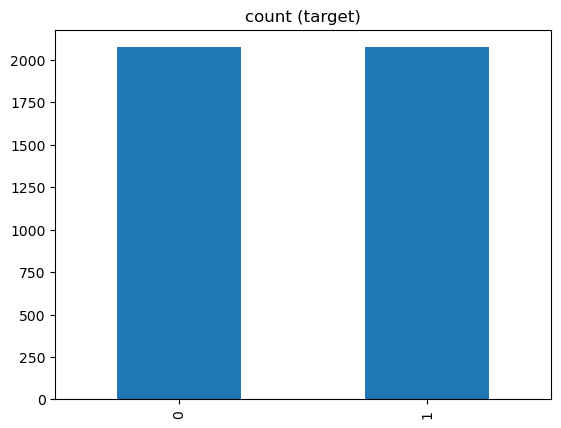

In [129]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['delayed'].value_counts())# plot the count after under-sampeling
test_under['delayed'].value_counts().plot(kind='bar', title='count (target)')

total class of 1 and 0: 0    2073
1    2073
Name: delayed, dtype: int64


<Axes: title={'center': 'count (target)'}>

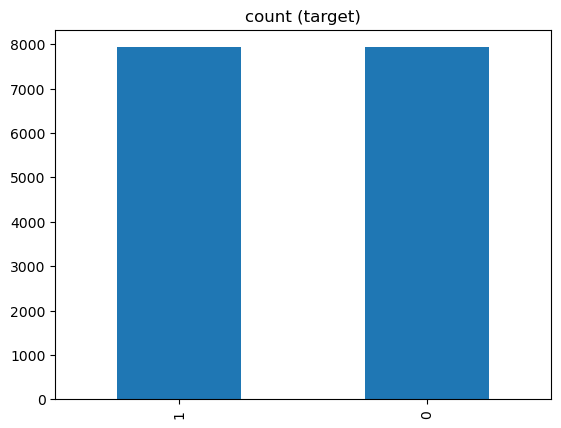

In [130]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['delayed'].value_counts())# plot the count after under-sampeling
test_over['delayed'].value_counts().plot(kind='bar', title='count (target)')

In [131]:
test_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15854 entries, 2577 to 9999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     15854 non-null  int64 
 1   month    15854 non-null  int64 
 2   day      15854 non-null  int64 
 3   carrier  15854 non-null  object
 4   origin   15854 non-null  object
 5   dest     15854 non-null  object
 6   delayed  15854 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 990.9+ KB


In [132]:
from sklearn.preprocessing import LabelEncoder
le_carrier = LabelEncoder()
test_over['carrier'] = le_carrier.fit_transform(test_over['carrier'])

le_dest = LabelEncoder()
test_over['dest'] = le_dest.fit_transform(test_over['dest'])

le_origin = LabelEncoder()
test_over['origin'] = le_origin.fit_transform(test_over['origin'])

# Converting Pandas DataFrame into a Numpy array
X = test_over.drop(columns='delayed',axis=True) # from column(years) to column(distance)
y = test_over['delayed'].values
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X1 = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=18)

In [133]:
# define a function to train and test the models
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def test_model(model,X_test,y_test):
  predictions = model.predict(X_test)
  accuracy = model.score(X_test, y_test)
  metrics_report = classification_report(y_test, predictions)
  precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
  return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [134]:
scaled_features = StandardScaler()
X_train = scaled_features.fit_transform(X_train)
X_test = scaled_features.transform(X_test)


In [17]:
pip install mplcyberpunk

Note: you may need to restart the kernel to use updated packages.


In [97]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
import tensorflow as tf
from keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras import callbacks
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax
import random

def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

In [73]:
import tensorflow as tf
import pygad.kerasga
from sklearn.metrics  import mean_absolute_error
X = tf.stack(X)
y = tf.stack(y)
classifier = tf.keras.Sequential()
tf.compat.v1.reset_default_graph()
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform' , activation = 'relu', input_dim = X_train.shape[1])) 
# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the third hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
# Compiling the ANN 
classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

r = classifier.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   callbacks=[callbacks.EarlyStopping(min_delta=0.0001,patience=40,restore_best_weights=True),
                             tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)],
                   batch_size=16)

prediction = classifier.predict(X_test)
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']




Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
2046/2046 [==============================] - 5s 2ms/step


In [9]:
pip install pygad

Note: you may need to restart the kernel to use updated packages.


In [136]:
array_X = X_train #.values (Scaler function return np array and pygad working with np.array)
array_y = y_train
array_X.shape,array_y.shape

((11890, 6), (11890,))

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
import pygad
import numpy
import pygad
import pygad.nn

import pygad.gann
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
y_pred_tr = [1 if each >= 0.5 else 0 for each in classifier.predict(X_train)]
y_pred_ts = [1 if each >= 0.5 else 0 for each in classifier.predict(X_test)]
# 
print('Train Accuracy score: {0:0.2f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.2f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.3f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

2046/2046 [==============================] - 4s 2ms/step
Train Accuracy score: 0.72
Train ROC AUC score: 0.50
Test Accuracy score: 0.72
Test ROC-AUC score: 0.500
[[47071     0]
 [18399     0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     47071
           1       0.00      0.00      0.00     18399

    accuracy                           0.72     65470
   macro avg       0.36      0.50      0.42     65470
weighted avg       0.52      0.72      0.60     65470



In [29]:
X_train

array([[ 1.71037359,  0.31765815, -0.9137104 , ..., -0.58094657,
        -0.45207149,  0.47624563],
       [-0.67222728,  0.05249384, -0.97355859, ..., -0.60613828,
         2.73840769, -0.03319001],
       [ 0.81782044,  0.13420207,  1.07798973, ..., -0.40044468,
        -0.52980052, -1.32200629],
       ...,
       [-0.93954813, -0.28498535,  0.86815652, ...,  0.56950814,
         2.66233693,  0.32499021],
       [ 0.8609545 ,  0.17211612, -0.15460809, ..., -0.43827509,
         2.69422731, -0.32930717],
       [ 1.25442626, -0.25552972,  1.72501717, ..., -0.20941559,
        -0.58073783, -1.36530996]])

In [15]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

In [16]:
last_fitness = 0

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    if ga_instance.generations_completed % verbose == 0:
        print("Generation = {generation}".format(generation=ga_instance.generations_completed))
        print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
        print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy();



In [32]:
# Prepare to data

#Before building and training neural networks, the training data (input and output) is to be prepared. 
# The inputs and the outputs of the training data are NumPy arrays.
# Reading the input data.
data_inputs = array_X
# Optional step of filtering the input data using the standard deviation.
#features_STDs = numpy.std(a=data_inputs, axis=0)
#data_inputs = data_inputs[:, features_STDs>50]

# Reading the output data.
data_outputs = array_y

# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]

# The number of neurons in the output layer (i.e. number of classes).
# For the XOR models, there are 2 classes and thus their labels are 0 and 1. 
# The num_classes variable is assigned to 2.
num_classes = 2

In [33]:
num_solutions = 16


# population does not hold the numerical weights of the network
# instead it holds a list of references to each last layer of each network (i.e. solution) in the population. 
# A solution or a network can be used interchangeably.
# If there is a population with 3 solutions (i.e. networks), then the population is a list with 3 elements. 
# Each element is a reference to the last layer of each network. 
# Using such a reference, all details of the network can be accessed.



In [34]:
num_parents_mating = 5

# Number of generations

num_generations = 100

In [35]:
parent_selection_type = "tournament" # Type of parent selection.
keep_parents = -1 
# Number of parents to keep in the next population. 
# -1 means keep all parents and 0 means keep nothing.

####-sss (for steady state selection)
####-rws (for roulette wheel selection)
####-sus (for stochastic universal selection)
####-rank (for rank selection)
####-random (for random selection)
####-tournament (for tournament selection),
K_tournament=4 # Just tournament

In [36]:
crossover_type = "uniform" # Type of the crossover operator.

####-single_point (for single point crossover)
####-two_points (for two points crossover)
####-uniform (for uniform crossover)
####-scattered (for scattered crossover)

crossover_probability= 1 #arange(0,1)

In [37]:
mutation_percent_genes = 10 

mutation_type = "random" 

In [39]:
# The return of the initial_population() function holds references to the networks, not their weights. Using such references, the weights of all networks can be fetched.

num_solutions = 16

GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                # chromosomes
                                num_neurons_input=num_inputs,

                                num_neurons_hidden_layers=[8,16,32],

                                num_neurons_output=num_classes,
                                hidden_activations=["relu", "relu","relu"],
                        
                                output_activation="sigmoid"
                                
                               )

population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)


initial_population = population_vectors.copy()

In [41]:
verbose = 100
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       K_tournament=K_tournament,
                       parent_selection_type=parent_selection_type,
                       crossover_probability=crossover_probability,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)






In [ ]:

ga_instance.run()


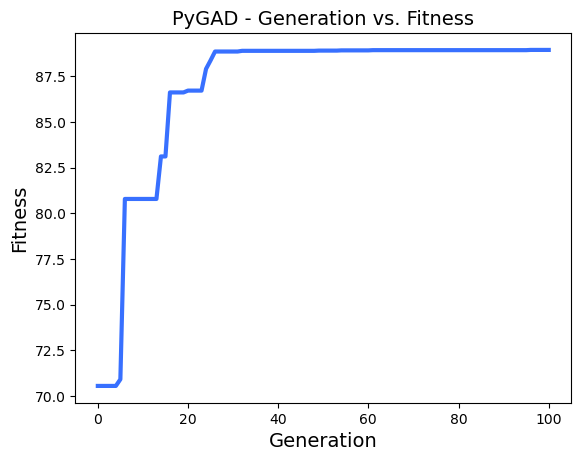

Fitness value of the best solution = 88.9375
Index of the best solution : 0
Best fitness value reached after 96 generations.


In [36]:
ga_instance.plot_fitness()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs)


In [37]:
num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))

Number of correct classifications : 7115.
Number of wrong classifications : 885.
Classification accuracy : 88.9375.


In [55]:
y_pred_tr = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_train)
y_pred_ts = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_test)


print('Train Accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.4f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

Train Accuracy score: 0.8886
Train ROC AUC score: 0.8962
Test Accuracy score: 0.8910
Test ROC-AUC score: 0.8970
[[1059  159]
 [  59  723]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1218
           1       0.82      0.92      0.87       782

    accuracy                           0.89      2000
   macro avg       0.88      0.90      0.89      2000
weighted avg       0.90      0.89      0.89      2000



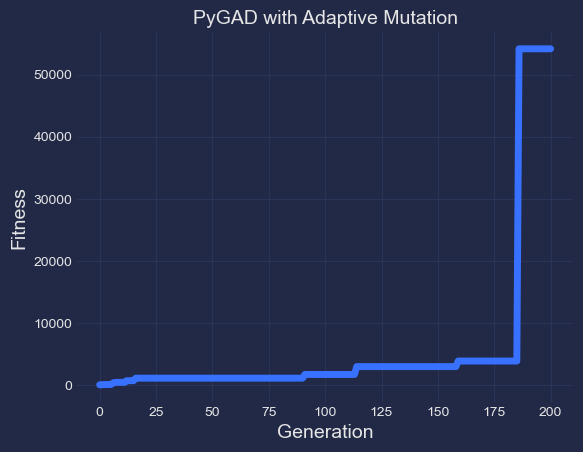

CPU times: total: 10.3 s
Wall time: 10.4 s


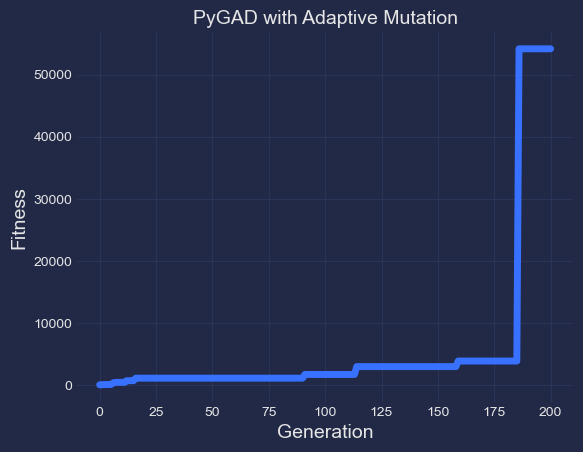

In [33]:
%%time
import pygad
import numpy

function_inputs = np.random.randn(40) # Function inputs.
desired_output = 44 # Function output.

def fitness_func_adaptive(solution, solution_idx):
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    # The value 0.000001 is used to avoid the Inf value when the denominator numpy.abs(output - desired_output) is 0.0.
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=200,
                       fitness_func=fitness_func_adaptive,
                       num_parents_mating=10,
                       mutation_percent_genes= (25,12),
                       mutation_probability=(0.35,0.12),
                       mutation_num_genes=(4,2),
                       sol_per_pop=200,
                       num_genes=len(function_inputs),
                       mutation_type="adaptive")

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness(title="PyGAD with Adaptive Mutation", linewidth=5)


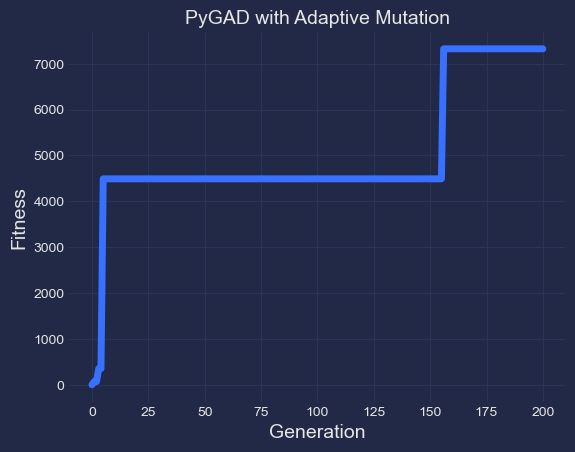

CPU times: total: 6.09 s
Wall time: 6.11 s


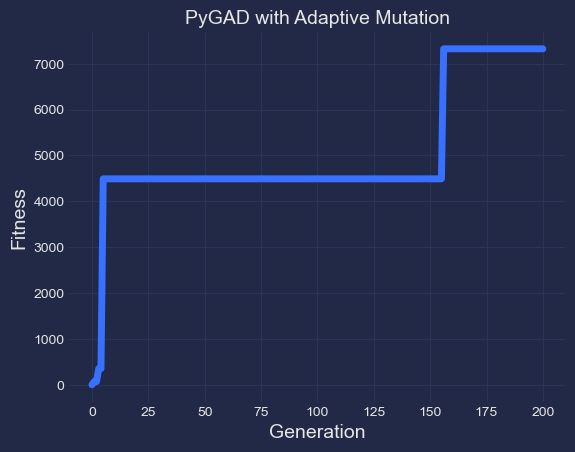

In [34]:
%%time
ga_instance = pygad.GA(num_generations=200,
                       fitness_func=fitness_func_adaptive,
                       num_parents_mating=10,
                       mutation_percent_genes= 10,
                       sol_per_pop=200,
                       num_genes=len(function_inputs),
                       mutation_type="random")

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness(title="PyGAD with Adaptive Mutation", linewidth=5)

250/250 [==============================] - 1s 3ms/step
Generation = 1
250/250 [==============================] - 1s 3ms/step
Fitness    = 4.45009322500719
250/250 [==============================] - 1s 3ms/step
Generation = 2
250/250 [==============================] - 1s 3ms/step
Fitness    = 4.45009322500719
250/250 [==============================] - 1s 3ms/step
Generation = 3
250/250 [==============================] - 1s 3ms/step
Fitness    = 4.7310880217280245
250/250 [==============================] - 1s 3ms/step
Generation = 4
250/250 [==============================] - 1s 3ms/step
Fitness    = 4.7310880217280245
250/250 [==============================] - 1s 3ms/step
Generation = 5
250/250 [==============================] - 1s 3ms/step
Fitness    = 4.779513053471494
250/250 [==============================] - 1s 3ms/step
Generation = 6
250/250 [==============================] - 1s 4ms/step
Fitness    = 4.779752025044782
250/250 [==============================] - 1s 4ms/step
Generatio

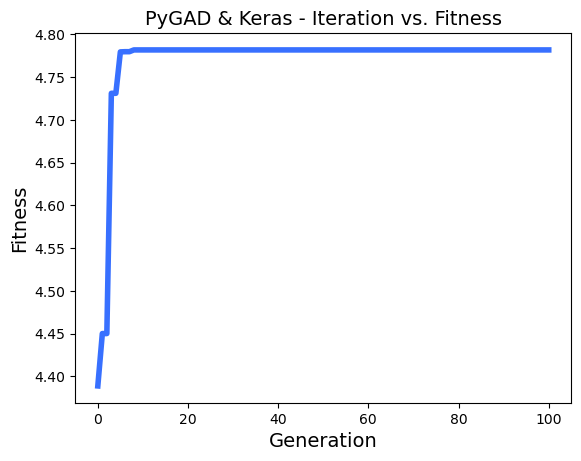

250/250 [==============================] - 1s 2ms/step
Fitness value of the best solution = 4.781822069090809
Index of the best solution : 0
250/250 [==============================] - 1s 3ms/step
Predictions : 
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Absolute Error :  0.2091253


In [102]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(6)
dense_layer1 = tensorflow.keras.layers.Dense(8, activation="relu")(input_layer)
dense_layer2 = tensorflow.keras.layers.Dense(16,activation="relu")(dense_layer1)
dense_layer3 = tensorflow.keras.layers.Dense(32,activation="relu")(dense_layer2)
output_layer = tensorflow.keras.layers.Dense(1, activation="sigmoid")(dense_layer3)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = array_X

# Data outputs
data_outputs = array_y

num_generations = 100
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)

In [104]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy' ,metrics = ['accuracy'])

In [105]:
import pickle
with open('modelg.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://b43c37e2-9781-4bf9-9c7c-0b97a2f102f3/assets
